# Music Genre Classification Prediction

Dataset Information: 

artist: Name of the Artist.

song: Name of the Track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration in milliseconds :Time of the song

time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

Class: Genre of the track.

## Importing libraries and training data:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,cross_val_predict, RandomizedSearchCV
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

In [25]:
train_set = pd.read_csv('file-location')
train_set.drop(['Id'], axis=1, inplace=True) 
print("train_set shape is: ", train_set.shape)
train_set.head()

train_set shape is:  (14396, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

Modifying Columns' names

In [26]:
#Removes spaces and changes upper case letters to lower case letters
print("Column names: ", train_set.columns)
train_set.columns= train_set.columns.str.replace(" ","_").str.lower()
print("Column names after: ", train_set.columns)

Column names:  Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')
Column names after:  Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in_min/ms', 'time_signature', 'class'],
      dtype='object')


Taking a look at the values:

In [5]:
train_set.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class
count,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Working on duration_in_min/ms

Not all of the values in 'duration_in_min/ms' are in Millisecond, some of them are in minutes

In [27]:
#THere are 2075 values that are in minutes
train_set[train_set['duration_in_min/ms'] <=40]['duration_in_min/ms'].sort_values(ascending=False)
# train_set.loc[(train_set['duration_in_min/ms'] < 30)]['duration_in_min/ms'].sort_values(ascending=False) Same output

4882     29.886000
12978    23.291550
13709    18.709783
13849    16.743783
491      13.023283
           ...    
6345      0.991983
5945      0.979333
4437      0.969150
5117      0.533917
11368     0.501650
Name: duration_in_min/ms, Length: 2075, dtype: float64

In [28]:
#We use a variable called condition to make the code below shorter
condition = train_set['duration_in_min/ms'] <=40

# If duration_in_min/ms value is less than 40, then multiply by 60,000
"""train_set[train_set['duration_in_min/ms'] <=40]['duration_in_min/ms'] = 
train_set[train_set['duration_in_min/ms'] <=40]['duration_in_min/ms']*6000
Use >> .loc[row_indexer,col_indexer] = value << instead"""
#This changes the data in 'duration_in_min/ms' column
train_set.loc[condition,'duration_in_min/ms'] = train_set.loc[condition,'duration_in_min/ms']*60000

#To check that are values were changed
(train_set['duration_in_min/ms'] <=40).value_counts() 

False    14396
Name: duration_in_min/ms, dtype: int64

Renaming 'duration_in_min/ms' column

In [29]:
train_set.rename(columns={"duration_in_min/ms": "duration_in_ms"},inplace=True)
train_set.columns

Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in_ms',
       'time_signature', 'class'],
      dtype='object')

Checking for unkown/null values

In [30]:
# train_set.isna().any()
train_set[train_set.columns[train_set.isnull().any()]].isnull().sum()

popularity           333
key                 1609
instrumentalness    3541
dtype: int64

Checking and dealing with "Class" column duplicates

In [31]:
train_set[train_set.duplicated(subset = train_set.columns.difference(['class']))]
#Returns duplicates that have different Class values

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
600,The Chats,Drunk n Disorderly,47.0,0.509,0.733,9.0,-5.909,1,0.1260,0.016500,NaN,0.4040,0.676,109.736,75760.0,4,6
671,Alice Cooper,School's Out,68.0,0.294,0.745,5.0,-9.138,1,0.0461,0.050000,0.125000,0.6760,0.347,134.364,210107.0,4,10
709,Foals,My Number,68.0,0.639,0.715,6.0,-8.954,0,0.0392,0.024300,0.000552,0.6190,0.813,128.072,238853.0,4,10
862,Freeds,Fruit Bats,42.0,0.897,0.466,10.0,-10.180,1,0.0478,0.556000,0.000165,0.1190,0.522,104.944,175313.0,4,9
1038,Modest Mouse,Float On,72.0,0.649,0.888,6.0,-4.807,1,0.0293,0.013000,0.000002,0.0888,0.553,100.975,208467.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377,Resolve,Seasick Sailor,43.0,0.468,0.964,1.0,-5.384,0,0.0931,0.009140,0.000014,0.3500,0.185,95.035,219185.0,4,8
14379,POORSTACY,Public Enemy,NaN,0.520,0.967,3.0,-3.837,0,0.4890,0.002480,0.000003,0.3280,0.477,179.924,149500.0,4,1
14381,Ozzy Osbourne,"Mama, I'm Coming Home",69.0,0.282,0.656,8.0,-6.557,1,0.0302,0.010500,NaN,0.0892,0.242,139.352,251867.0,4,10
14384,Jackie Hayes,eye 2 eye,48.0,0.638,0.666,4.0,-6.951,0,0.0392,0.007840,0.000067,0.3140,0.651,131.962,185455.0,4,6


In [32]:
train_set[train_set['track_name']=="The Joker"]
#Same track appears twice but has different popularity

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
4179,Steve Miller Band,The Joker,76.0,0.596,0.448,5.0,-9.616,1,0.0396,0.365,0.000005,0.206,0.796,83.293,264504.0,4,10
5272,Steve Miller Band,The Joker,12.0,0.596,0.448,5.0,-9.616,1,0.0396,0.365,0.000005,0.206,0.796,83.293,264504.0,4,10


In [33]:
train_set[train_set.duplicated()]
#Returns duplicates that have exact same values

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class
5852,Little Simz,Venom,75.0,0.436,0.655,7.0,-8.153,1,0.1590,0.4250,NaN,0.393,0.523,139.712,154749.0,4,9
10163,Joan Jett & The Blackhearts,I Love Rock 'N Roll,74.0,0.535,0.716,4.0,-5.025,1,0.0431,0.3260,NaN,0.659,0.901,94.379,175173.0,4,10
13046,Transvision Vamp,I Want Your Love,48.0,0.465,0.821,4.0,-11.115,1,0.0487,0.0133,0.00855,0.447,0.697,149.824,209907.0,4,10


In [49]:
# idx1 = pd.Index([2, 1, 3, 4])
# idx2 = pd.Index([3, 4, 5, 6])
# idx2.difference(idx1)
# >> Int64Index([5, 6], dtype='int64')
# idx1.difference(idx2)
# >> Int64Index([1, 2], dtype='int64')

In [13]:
train_set.duplicated(subset = train_set.columns.difference(['class'])).value_counts()

False    13312
True      1084
dtype: int64

In [34]:
print("Shape of dataset before removing duplicate rows =", train_set.shape)

train_set.drop_duplicates(subset = train_set.columns.difference(['class']), inplace = True, ignore_index = True)
print("Shape of dataset after removing duplicate rows =", train_set.shape)

Shape of dataset before removing duplicate rows = (14396, 17)
Shape of dataset after removing duplicate rows = (13312, 17)


## Data Analysis

Artists with most songs in the dataset

In [15]:
train_set['artist_name'].value_counts().head(5)

Backstreet Boys    58
Westlife           53
Britney Spears     47
Omer Adam          39
Eyal Golan         38
Name: artist_name, dtype: int64

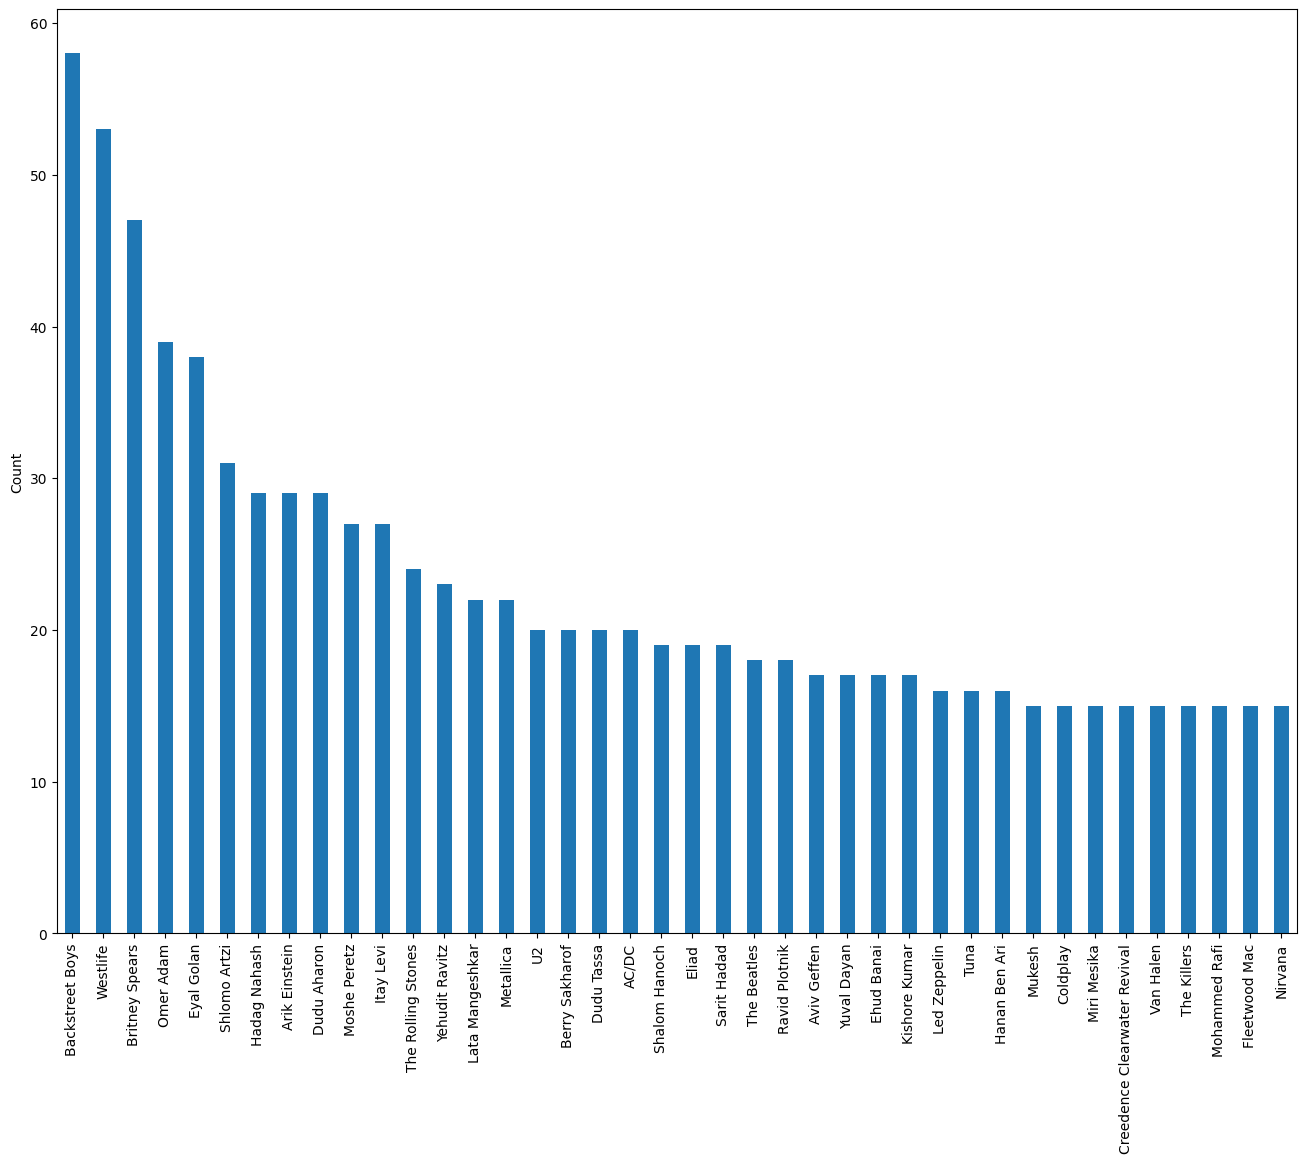

In [16]:
train_set['artist_name'].value_counts().head(40).plot(kind='bar',figsize=(16,12))
plt.ylabel('Count')
plt.show()

Correlation between numerical attributes and 'class' column 

In [42]:
train_set.corr()['class'].sort_values(ascending=False)

class               1.000000
energy              0.232102
loudness            0.184936
popularity          0.173065
time_signature      0.047202
liveness            0.042404
tempo               0.042246
duration_in_ms      0.008948
key                -0.003355
instrumentalness   -0.027491
mode               -0.041634
speechiness        -0.068750
valence            -0.075240
danceability       -0.101665
acousticness       -0.259013
Name: class, dtype: float64

Correlation heat map

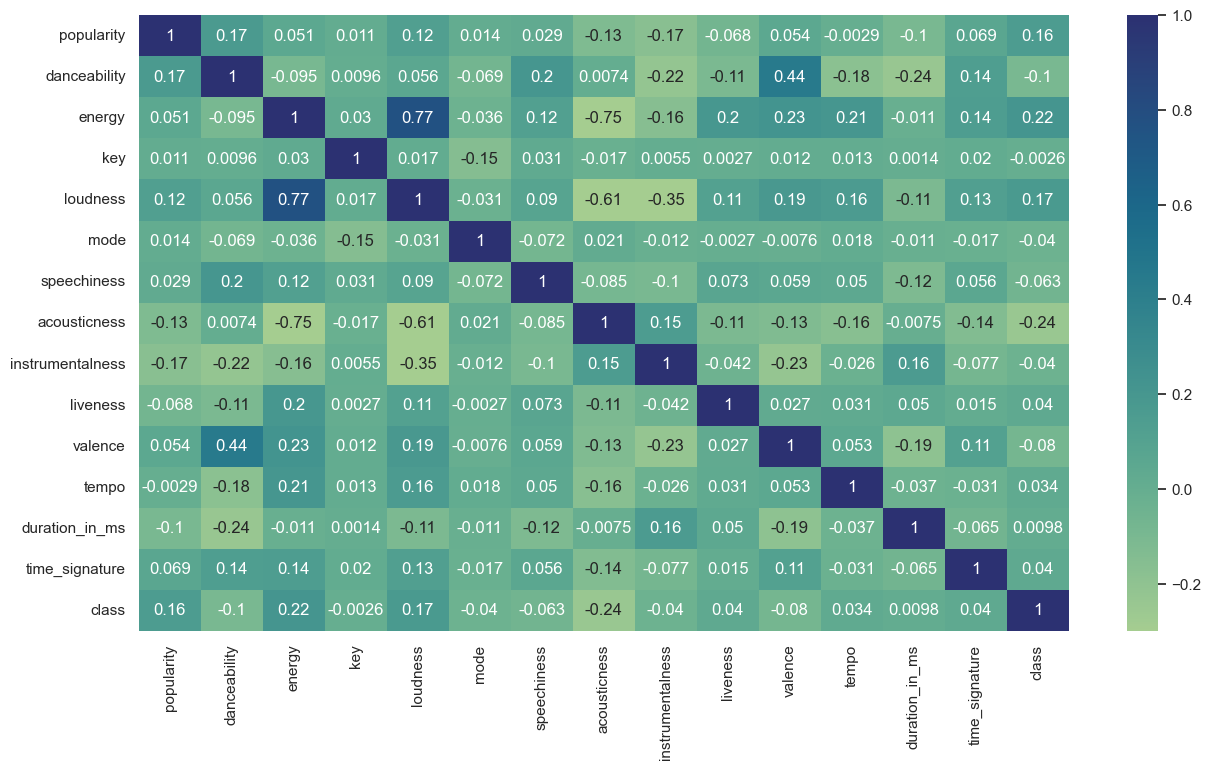

In [279]:
sns.heatmap(train_set.corr(), annot=True, cmap='crest',vmax=1, vmin=-0.3 )
sns.set(rc={'figure.figsize':(15,8)})

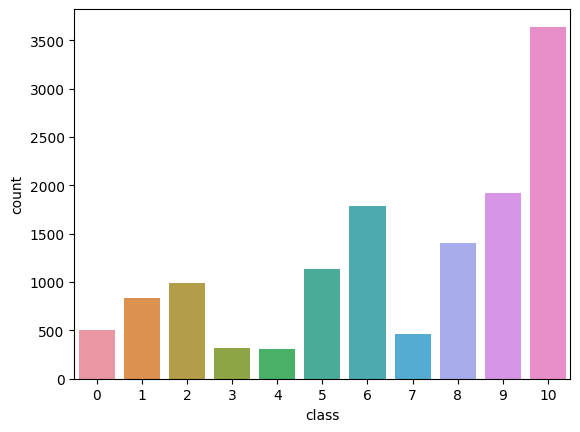

In [43]:
sns.countplot(data= train_set, x= train_set["class"])
plt.show()

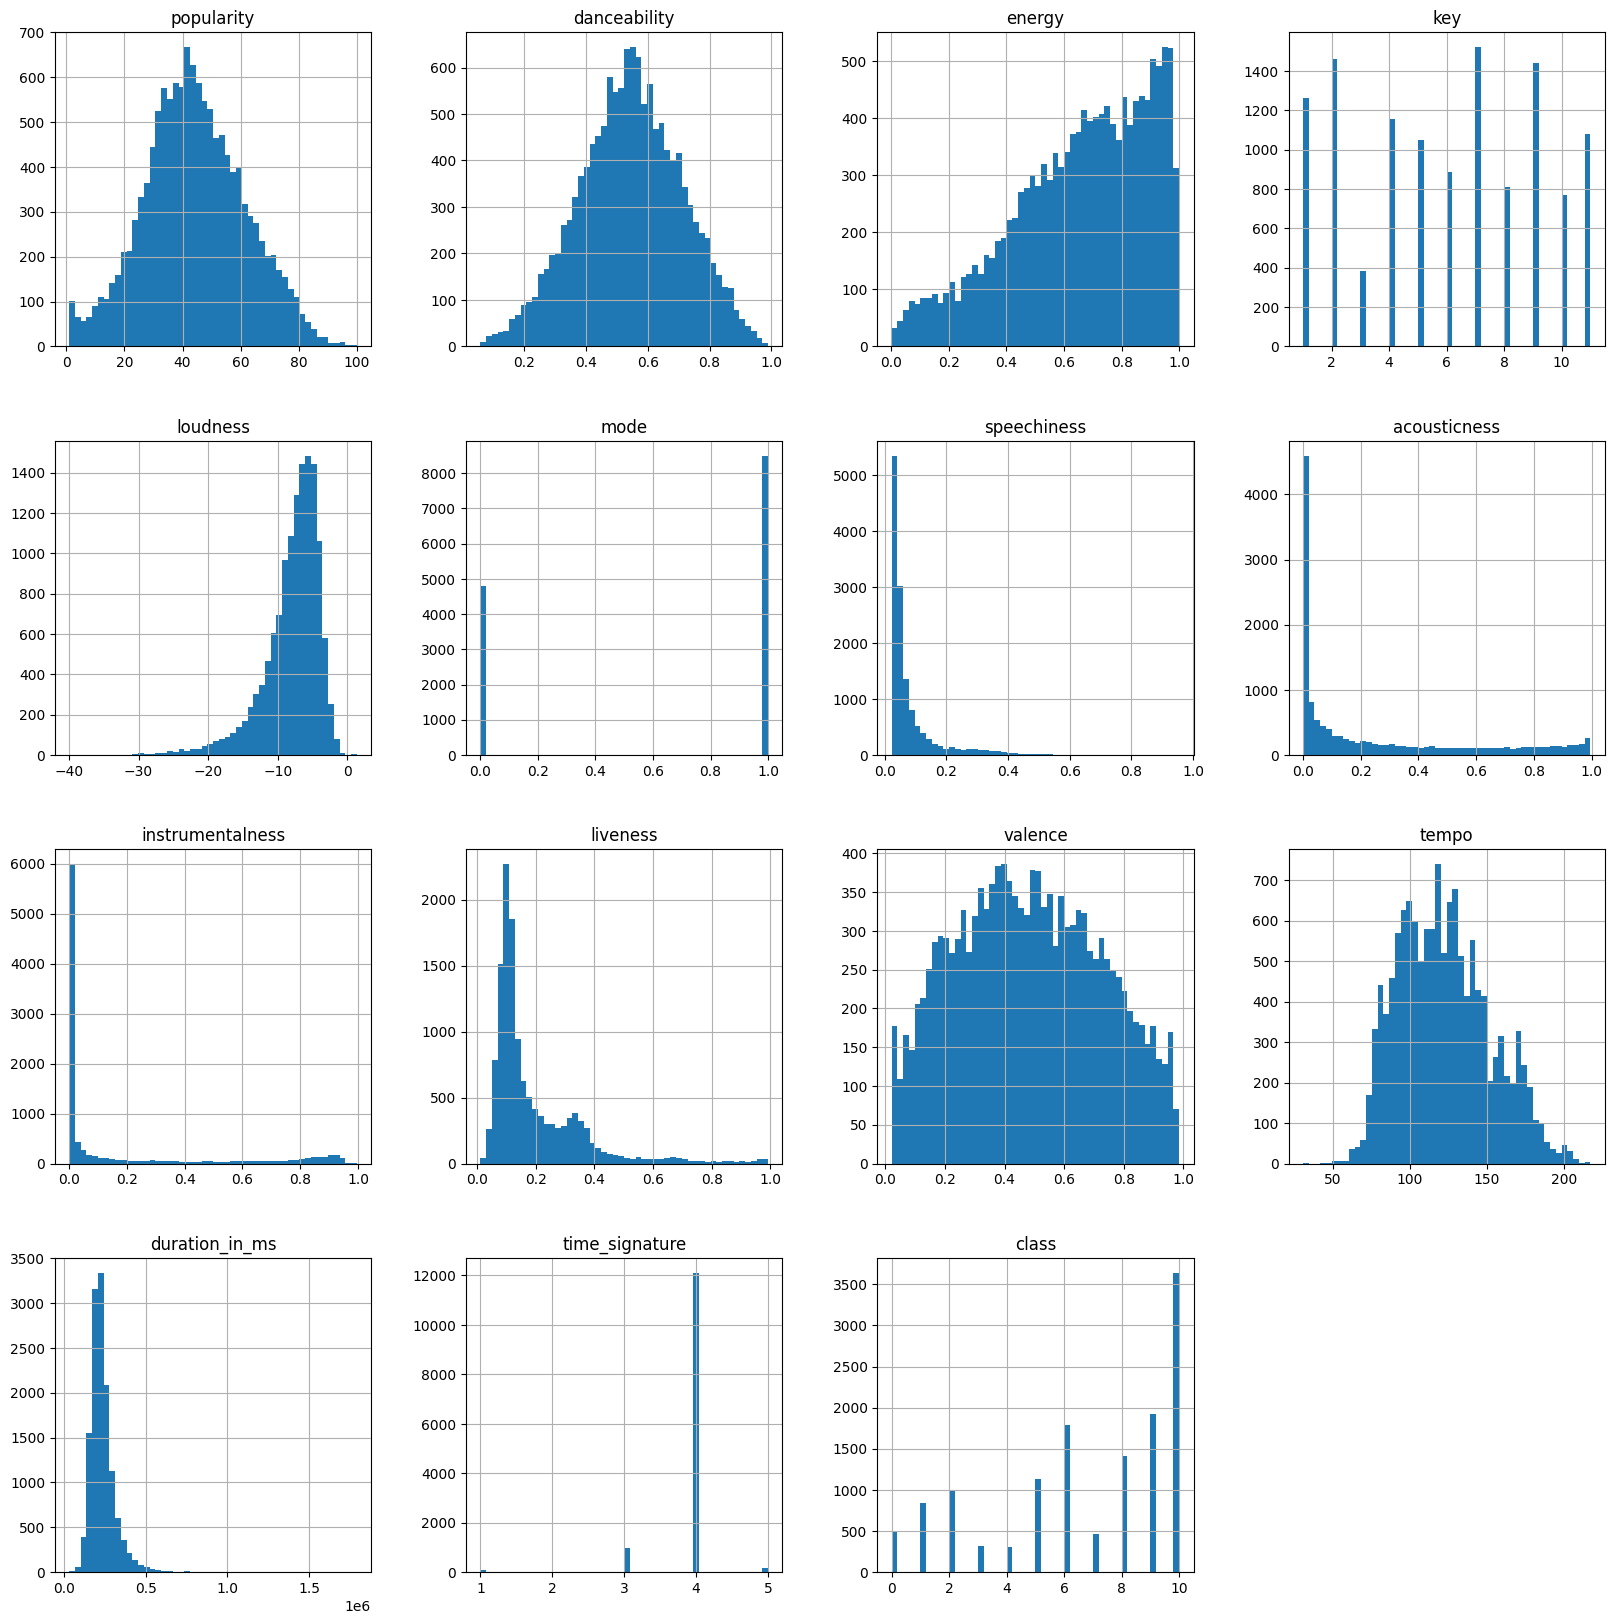

In [17]:
train_set.hist(bins=50, figsize=(20, 20),grid=True)
plt.show()
#Energy, Loudness, Speechiness, Acousticness, instrumentalness, duration_in_ms, liveness are all Skewed

Skewness 

In [35]:
train_set.skew()
#Energy, Loudness, Speechiness, Acousticness, instrumentalness, duration_in_ms, liveness are all Skewed

C:\Users\TQ\AppData\Local\Temp\ipykernel_10332\3459437689.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set.skew()


popularity          0.082546
danceability       -0.085693
energy             -0.615383
key                -0.048348
loudness           -1.719361
mode               -0.577062
speechiness         3.086260
acousticness        1.036140
instrumentalness    1.510983
liveness            2.205829
valence             0.099441
tempo               0.384265
duration_in_ms      3.835998
time_signature     -4.003748
class              -0.681687
dtype: float64

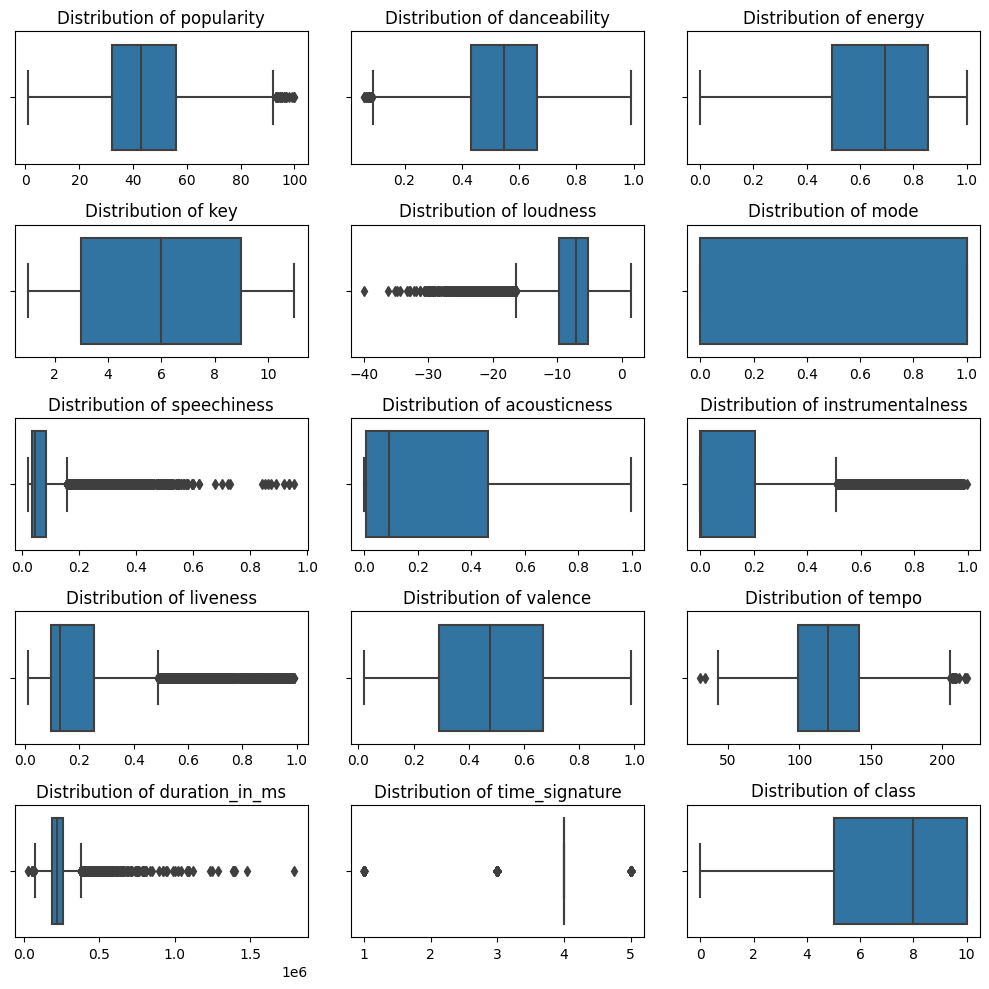

In [36]:
num_attribs = train_set.select_dtypes(include=[np.number]) # stores all integer/float columns

fig = plt.figure(figsize=(10, 10))
for i,col in enumerate(num_attribs.columns, 1): 
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = num_attribs, x=num_attribs[col])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout(w_pad=2)
plt.show()

In [ ]:
# faced an issue with energy and duration_in_ms Skewness

In [37]:
train_set["loudness"] = np.cbrt(train_set["loudness"]) # cube root transform
train_set["speechiness"] = np.reciprocal(train_set["speechiness"]) # reciprocal transform
train_set["acousticness"] = np.cbrt(train_set["acousticness"]) # cube root transform
train_set["instrumentalness"] = np.log(train_set["instrumentalness"]) # log transform
train_set["liveness"] = np.log(train_set["liveness"]) # log transform

In [38]:
train_set.skew()

C:\Users\TQ\AppData\Local\Temp\ipykernel_10332\1115403286.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set.skew()


popularity          0.082546
danceability       -0.085693
energy             -0.615383
key                -0.048348
loudness           -0.215996
mode               -0.577062
speechiness        -0.100035
acousticness        0.140229
instrumentalness   -0.201644
liveness            0.504727
valence             0.099441
tempo               0.384265
duration_in_ms      3.835998
time_signature     -4.003748
class              -0.681687
dtype: float64

In [158]:
# train_set["liveness"].hist()
# cbrt, reciprocal, log, sqrt
# lou = np.log(train_set["liveness"])
# lou.hist()
# train_set["loudness"].hist()

In [81]:
# for col in train_set.select_dtypes(include=[np.number]).columns: 
#     if col == "class":
#         continue
    
#     ax = sns.lmplot(data=train_set, x='class', y=col) #implot looks better than scatterplot
#     plt.title(f"class Vs. {col}")
#     plt.show()

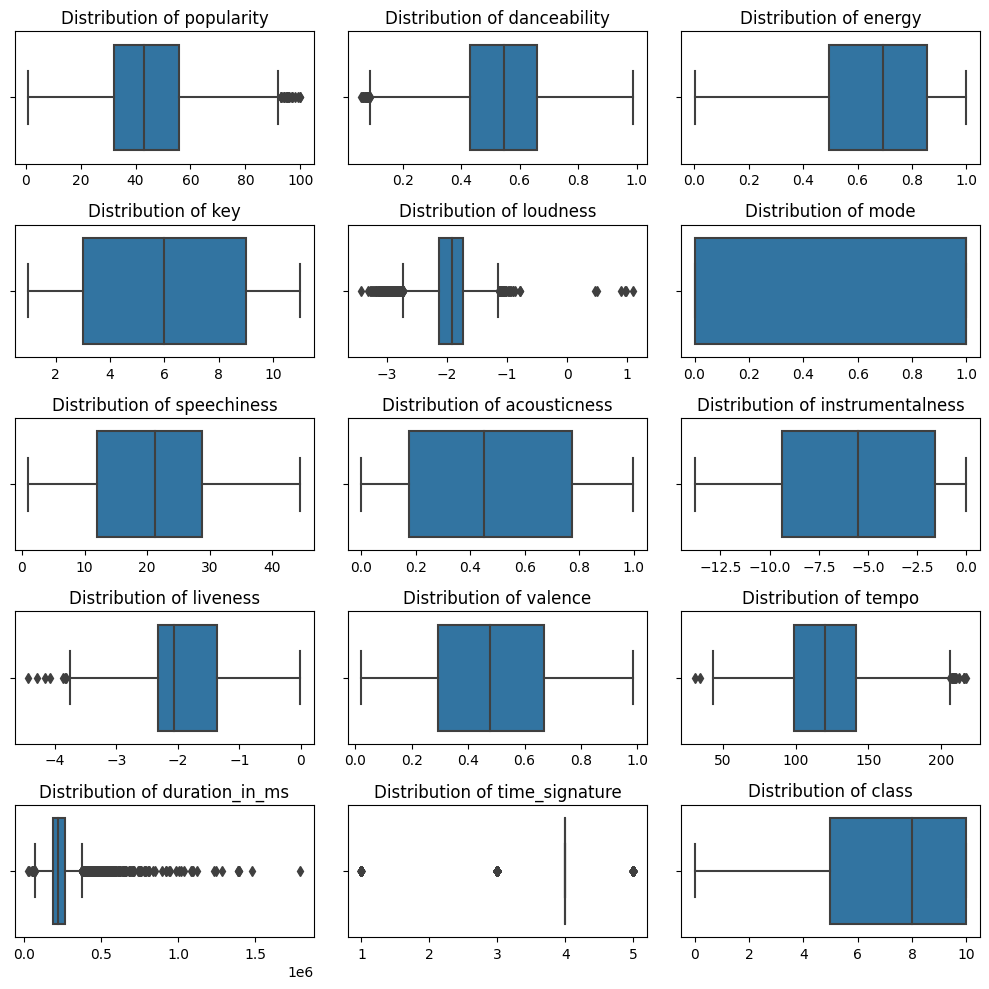

In [39]:
#After Skewness 

num_attribs = train_set.select_dtypes(include=[np.number]) # stores all integer/float columns
fig = plt.figure(figsize=(10, 10))
for i,col in enumerate(num_attribs.columns, 1): 
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = num_attribs, x=num_attribs[col])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout(w_pad=2)
plt.show()

# Preprocessing

## Splitting the training data

In [40]:
print('train_set columns',train_set.columns)
print('train_set shape: ',train_set.shape)

train_set columns Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in_ms',
       'time_signature', 'class'],
      dtype='object')
train_set shape:  (13312, 17)


In [41]:
x = train_set.drop(['class'],axis=1)
y = train_set['class']
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state =0)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (10649, 16)
x_test shape:  (2663, 16)
y_train shape:  (10649,)
y_test shape:  (2663,)


## Feature Scaling and Transformation

In [42]:
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler

In [43]:
num_attribs = (x_train.select_dtypes(include=[np.number])).columns
cat_attribs= (x_train.select_dtypes(include=[object])).columns

print("num_attribs are: ", num_attribs,'\n','cat_attribs are: ',cat_attribs)

num_attribs are:  Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in_ms', 'time_signature'],
      dtype='object') 
 cat_attribs are:  Index(['artist_name', 'track_name'], dtype='object')


In [44]:
train_set.isna().sum()

artist_name            0
track_name             0
popularity           314
danceability           0
energy                 0
key                 1489
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness    3335
liveness               0
valence                0
tempo                  0
duration_in_ms         0
time_signature         0
class                  0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

x_train[['popularity','instrumentalness']] = imp.fit_transform(x_train[['popularity','instrumentalness']])
x_test[['popularity','instrumentalness']] = imp.fit_transform(x_test[['popularity','instrumentalness']])

In [46]:
x_train[train_set.columns[train_set.isnull().any()]].isnull().sum()

popularity             0
key                 1191
instrumentalness       0
dtype: int64

In [47]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1)
x_train[['key']]=imp.fit_transform(x_train[['key']])
x_test[['key']]=imp.fit_transform(x_test[['key']])

In [48]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])
#('imputer',SimpleImputer(strategy="median"))
#Simple imputer because there NaN and Zero values
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ])

transformer= ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ]) #("cat",  cat_pipeline, cat_attribs)

transformed_columns = transformer.fit_transform(x_train)
transformed_columns_test = transformer.transform(x_test)
print('transformed_columns shape is: ', transformed_columns.shape)
print('x_test shape is: ', x_test.shape)
print(transformed_columns)

transformed_columns shape is:  (10649, 14)
x_test shape is:  (2663, 16)
[[-0.35216688 -0.90511747  1.17952548 ...  1.10732271 -0.57780764
   0.21187285]
 [ 0.28698029  1.37907523 -0.25660383 ...  0.70303133 -0.33532022
   0.21187285]
 [-0.41027117 -0.3235776   1.34798639 ... -0.41768119 -0.08583661
   0.21187285]
 ...
 [-0.17785401 -0.41350644 -0.48823759 ...  0.2970458   2.18972717
   0.21187285]
 [ 0.57750173  1.25317485 -1.12417755 ...  0.48767129  0.14158031
   0.21187285]
 [ 0.34508458 -0.83916965  1.28481355 ...  1.85308648  0.18880747
   0.21187285]]


# Training and Evaluating different models 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

In [50]:
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)

Evaluating different Models

Model KNN CV_Score: [0.3885446  0.38880541 0.3800939  0.38786627 0.37615023 0.38824192]
Model KNN Model Accuracy: 0.41081487044686443
Model RFC CV_Score: [0.49408451 0.50638618 0.5029108  0.5039444  0.51061033 0.49417731]
Model RFC Model Accuracy: 0.5069470521967706
Model log_reg CV_Score: [0.45032864 0.47126221 0.4599061  0.45848986 0.46197183 0.46187077]
Model log_reg Model Accuracy: 0.44949305294780323
Model sgd_clf CV_Score: [0.39211268 0.3985725  0.39061033 0.38767844 0.3799061  0.38767844]
Model sgd_clf Model Accuracy: 0.3897859556890725
Model xgb_clf CV_Score: [0.48938967 0.49173554 0.49051643 0.49004508 0.48938967 0.47952667]
Model xgb_clf Model Accuracy: 0.4716485167104769


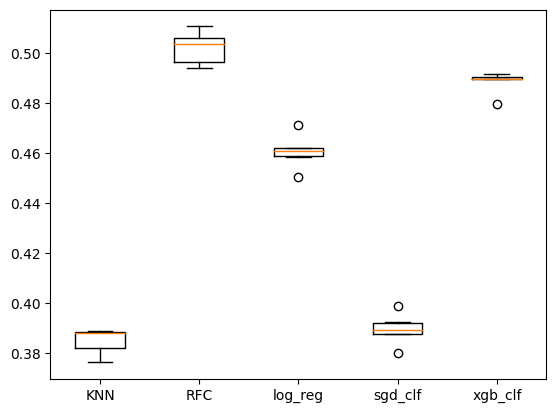

In [51]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
log_reg = LogisticRegression(random_state=42)
sgd_clf = SGDClassifier(random_state=42)
xgb_clf = XGBClassifier() 
models = {'KNN': knn,'RFC':rfc , "log_reg": log_reg,"sgd_clf":sgd_clf,'xgb_clf':xgb_clf}

results = [] #delete this

# models = {"Logistic Regression": LinearRegression(), 
#          "Decision Tree Regressor": DecisionTreeRegressor(random_state=0), 
#          "Random Forest Regressor": RandomForestRegressor(random_state=0),
#          "K Neighbors Regressor": KNeighborsRegressor(),
#          "XGB Regressor()":XGBRegressor()}

for name,model in models.items():
    model.fit(transformed_columns, y_train)
    preds = model.predict(transformed_columns_test)
    cv_score = cross_val_score(model, transformed_columns, y_train, cv=cv, scoring="accuracy")
    model_accuracy= accuracy_score(y_test,preds)
    # model_score = model.score(transformed_columns_test,y_test)
    # results.append(cv_score.mean()) delete this
    
    print(f"Model {name} CV_Score: {cv_score}")
    print(f"Model {name} Model Accuracy: {model_accuracy}")
    # print(f"Model {name} Model Score: {model_score}")
    results.append(cv_score)
plt.boxplot(results, labels=models.keys())
plt.show()

# print(results)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
model_used = gbc
model_used.fit(transformed_columns, y_train)
preds = model_used.predict(transformed_columns_test)
# preds = cross_val_predict(dt_cla, transformed_columns, y_train)
cv_score = cross_val_score(model_used, transformed_columns, y_train, cv=cv, scoring="accuracy")
model_accuracy= accuracy_score(y_test,preds)
# roc_score = roc_auc_score(y_test, preds, multi_class='ovr') 
# results.append(cv_score.mean())
# print(preds.shape)
print(f"Model {model_used} CV_Score: {cv_score}")
print(f"Model {model_used} Model Accuracy: {model_accuracy}")
# Model Accuracy: 0.48666917010889976

Model GradientBoostingClassifier(random_state=42) CV_Score: [0.48807512 0.50206612 0.49690141 0.49380165 0.497277   0.48553719]
Model GradientBoostingClassifier(random_state=42) Model Accuracy: 0.48666917010889976


In [53]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_cla = DecisionTreeClassifier(max_depth=4, criterion='entropy',random_state=42)
model_used = dt_cla
model_used.fit(transformed_columns, y_train)
preds = model_used.predict(transformed_columns_test)
# preds = cross_val_predict(dt_cla, transformed_columns, y_train)
cv_score = cross_val_score(model_used, transformed_columns, y_train, cv=cv, scoring="accuracy")
model_accuracy= accuracy_score(y_test,preds)
# roc_score = roc_auc_score(y_test, preds, multi_class='ovr') 
# results.append(cv_score.mean())
# print(preds.shape)
print(f"Model {model_used} CV_Score: {cv_score}")
print(f"Model {model_used} Model Accuracy: {model_accuracy}")
#Model Accuracy: 0.39128802102891475

Model DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) CV_Score: [0.39117371 0.3946281  0.40112676 0.38861758 0.39887324 0.39876033]
Model DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42) Model Accuracy: 0.39128802102891475


In [54]:
#RandomForestClassifier
model_used = rfc
model_used.fit(transformed_columns, y_train)
preds = model_used.predict(transformed_columns_test)
cv_score = cross_val_score(model_used, transformed_columns, y_train, cv=cv, scoring="accuracy")
model_accuracy= accuracy_score(y_test,preds)
# roc_score = roc_auc_score(y_test, preds, multi_class='ovr') 
# results.append(cv_score.mean())

print(f"Model {model_used} CV_Score: {cv_score}")
print(f"Model {model_used} Model Accuracy: {model_accuracy}")
#0.5243055555555556

Model RandomForestClassifier(n_estimators=1000, random_state=42) CV_Score: [0.49408451 0.50638618 0.5029108  0.5039444  0.51061033 0.49417731]
Model RandomForestClassifier(n_estimators=1000, random_state=42) Model Accuracy: 0.5069470521967706


In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(transformed_columns,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Trying lightgbm

In [64]:
import lightgbm as ltb
lightgbm_model = ltb.LGBMClassifier(random_state=42)
lightgbm_model.fit(transformed_columns,y_train)
lgbm_pred = lightgbm_model.predict(transformed_columns_test) #_test
accuracy = round(accuracy_score(y_test, lgbm_pred) * 100, 3) #y_test
accuracy
#53.472

47.953

Catboost

In [187]:
from catboost import CatBoostClassifier
model_used = CatBoostClassifier()
model_used.fit(transformed_columns, y_train)
preds = model_used.predict(transformed_columns_test)
cv_score = cross_val_score(model_used, transformed_columns, y_train, cv=cv, scoring="accuracy")
model_accuracy= accuracy_score(y_test,preds)
# roc_score = roc_auc_score(y_test, preds, multi_class='ovr') 
# results.append(cv_score.mean())

print(f"Model {model_used} CV_Score: {cv_score}")
print(f"Model {model_used} Model Accuracy: {model_accuracy}")

Learning rate set to 0.089272
0:	learn: 2.2567248	total: 14.9ms	remaining: 14.9s
1:	learn: 2.1622634	total: 30.1ms	remaining: 15s
2:	learn: 2.0790751	total: 45ms	remaining: 15s
3:	learn: 2.0063790	total: 59ms	remaining: 14.7s
4:	learn: 1.9491880	total: 72.9ms	remaining: 14.5s
5:	learn: 1.9016704	total: 86.4ms	remaining: 14.3s
6:	learn: 1.8578436	total: 100ms	remaining: 14.2s
7:	learn: 1.8178949	total: 114ms	remaining: 14.1s
8:	learn: 1.7892088	total: 127ms	remaining: 14s
9:	learn: 1.7586554	total: 141ms	remaining: 14s
10:	learn: 1.7330701	total: 155ms	remaining: 13.9s
11:	learn: 1.7117147	total: 168ms	remaining: 13.8s
12:	learn: 1.6869779	total: 182ms	remaining: 13.8s
13:	learn: 1.6676128	total: 197ms	remaining: 13.8s
14:	learn: 1.6516721	total: 210ms	remaining: 13.8s
15:	learn: 1.6356615	total: 223ms	remaining: 13.7s
16:	learn: 1.6181483	total: 238ms	remaining: 13.7s
17:	learn: 1.6035644	total: 251ms	remaining: 13.7s
18:	learn: 1.5911124	total: 265ms	remaining: 13.7s
19:	learn: 1.5805

F1 Score

In [194]:
from sklearn.metrics import f1_score

In [195]:
f1_score(y_test, preds, average="macro")
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

0.26184566567907136

Using VotingClassifier to improve results

In [18]:
from sklearn.ensemble import VotingClassifier

# voting classifier
final_model = VotingClassifier(
    estimators=[("rf", rfc), ("xgb", xgb_clf),("log_reg",log_reg) ],)

# training
final_model.fit(transformed_columns, y_train)

# prediction
prediction = final_model.predict(transformed_columns_test)

# evaluation
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)

print(f" Accuracy: {accuracy}%")

e:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy: 52.604%


Using Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
# bagging
bag_clf = BaggingClassifier(XGBClassifier(random_state=42, learning_rate= 0.001, 
                                      max_depth= 6, min_child_weight= 3, n_estimators= 500))

# training
bag_clf.fit(transformed_columns, y_train)

# prediction
prediction = bag_clf.predict(transformed_columns_test)

# evaluation
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)

print(f" Accuracy: {accuracy}%")

In [211]:
# from lazypredict.Supervised import LazyClassifier
# lacla = LazyClassifier(verbose=0,predictions=True)
# lacla.fit(x_train, x_test, y_train, y_test)

Using Stacking

In [370]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# {'KNN': knn,'RFC':rfc , "log_reg": log_reg,"sgd_clf":sgd_clf,'xgb_clf':xgb_clf}

estimators = [('RFC',rfc), ("log_reg",log_reg), ('xgb_clf',xgb_clf),]
# {'KNN': knn,'RFC':rfc , "log_reg": log_reg,"sgd_clf":sgd_clf,'xgb_clf':xgb_clf}

# building the model
final_estimator = GradientBoostingClassifier(random_state=42)

# Stacking Classifier
stack_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# training
stack_clf.fit(transformed_columns, y_train)

# prediction
prediction = stack_clf.predict(transformed_columns_test)

# evaluation
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)

print(f" Accuracy: {accuracy}%")

e:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

 Accuracy: 57.882%


Using PCA

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# principal_components = pca.fit_transform(transformed_columns)
# principal_components
# pca.explained_variance_ratio_
# df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=x.columns)

# Working with the Test set
Using the model with the highest score

Start by Importing the Test set

In [92]:
test_set =pd.read_csv('file-location')

print('test_set shape is',test_set.shape)
Id=test_set['Id']

# train_set.drop(['Id'], axis=1, inplace=True) 
# print(train_set.head())
# print("train_set shape is: ", train_set.shape)
# test_set.drop(cat_attribs,axis=1, inplace=True)

test_set shape is (3600, 17)


In [93]:
print("Column names: ", test_set.columns)
test_set.columns= test_set.columns.str.replace(" ","_").str.lower()
print("Column names after: ", test_set.columns)

Column names:  Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature'],
      dtype='object')
Column names after:  Index(['id', 'artist_name', 'track_name', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in_min/ms', 'time_signature'],
      dtype='object')


In [94]:
#We use a variable called condition to make the code below shorter
condition = test_set['duration_in_min/ms'] <=40

# If duration_in_min/ms value is less than 40, then multiply by 60,000

#This changes the data in 'duration_in_min/ms' column
test_set.loc[condition,'duration_in_min/ms'] = test_set.loc[condition,'duration_in_min/ms']*60000

#To check that are values were changed
# (test_set['duration_in_min/ms'] <=40).value_counts() 

test_set.rename(columns={"duration_in_min/ms": "duration_in_ms"},inplace=True)
test_set.columns

Index(['id', 'artist_name', 'track_name', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in_ms',
       'time_signature'],
      dtype='object')

In [102]:
test_set[test_set.columns[test_set.isnull().any()]].isnull().sum()

popularity           95
key                 405
instrumentalness    836
dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_in_ms'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

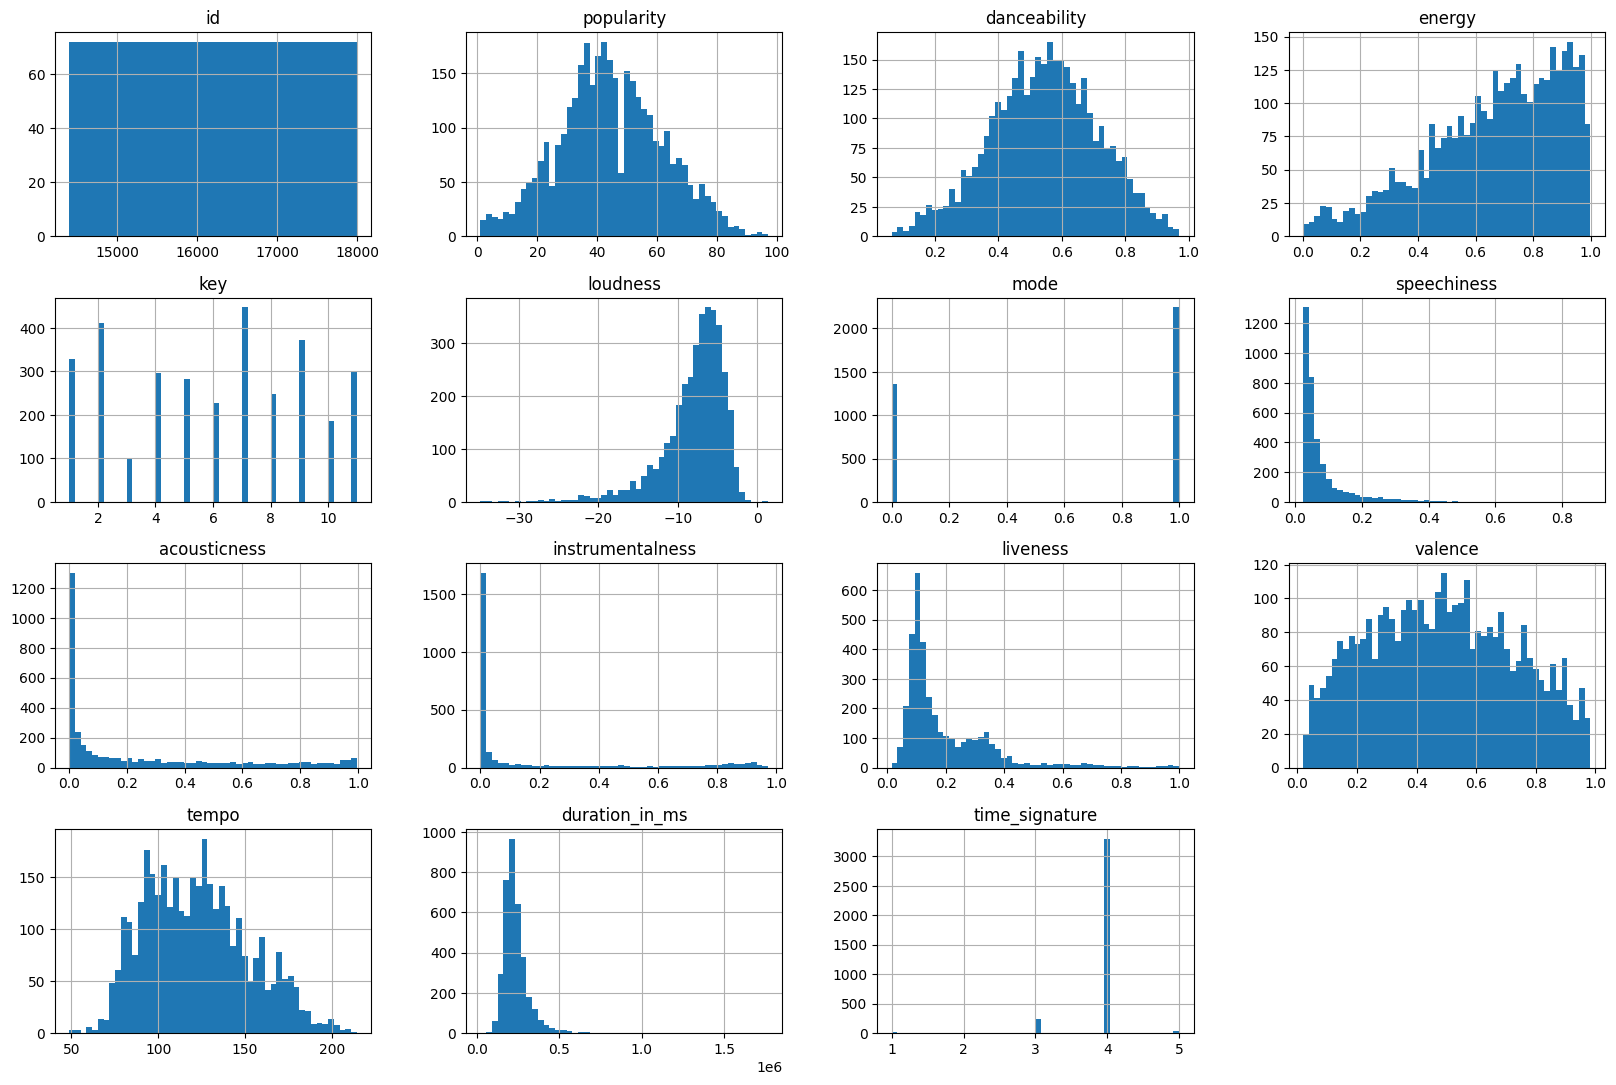

In [105]:
test_set.hist(bins=50,figsize=(20,13))

In [65]:
test_set.columns= test_set.columns.str.replace(" ","_").str.lower()
# columns = ["artist_name","track_name"]
# le = LabelEncoder()
# for col in columns:
#     test_set[col] = le.fit_transform(test_set[col])

transformed_columns_test_set = transformer.transform(test_set)
transformed_columns_test_set

test_set shape is (3600, 17)


KeyError: "['duration_in_ms'] not in index"

Appllying the model with the highest accuracy to Test dataset 

In [211]:
stack_clf
stack_clf.fit(transformed_columns,y_train)

pred =stack_clf.predict(transformed_columns_test_set)

e:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [224]:
#Using RandomForestClassifier becasue it returned better results
# rfc.fit(transformed_columns,y_train)

# test_drop = test_set.drop(['Id','Artist Name','Track Name'],axis=1)

# pred =rfc.predict(transformer.transform(test_drop))
# pred.shape

In [213]:
data = {'Id': Id, 'Class':pred}
sub = pd.DataFrame(data=data)
print(sub)

         Id  Class
0     14397      9
1     14398      6
2     14399      9
3     14400     10
4     14401      5
...     ...    ...
3595  17992     10
3596  17993      5
3597  17994      6
3598  17995      2
3599  17996     10

[3600 rows x 2 columns]


Saving the prediction

In [214]:
sub.to_csv('shai-music-genre-classification-rfc-xgb-log-labeleno-stacking.csv',index=False)

# Other possible modifications  

1- Using RandomForestClassifier Feature importance

In [20]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(transformed_columns, y_train)
for score, name in zip(rnd_clf.feature_importances_, train_set.columns):
    print(round(score, 2), name)

0.08 Artist Name
0.09 Track Name
0.09 Popularity
0.04 danceability
0.08 energy
0.01 key
0.1 loudness
0.1 mode
0.08 speechiness
0.06 acousticness
0.08 instrumentalness
0.06 liveness
0.12 valence
0.01 tempo
